In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm

import seaborn as sns
from IPython.display import Image
from pylab import rcParams

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# import statsmodels.discrete.discrete_model as sm
# import scipy.stats as sts
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             classification_report, roc_auc_score)
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

In [358]:
df_col = pd.read_csv("train_col_name.csv", header=None, sep=",")
df_col.head()

,0
0,A1
1,A2
2,A3
3,A4
4,A5


In [359]:
col_list = df_col[0].tolist()

In [360]:
df = pd.read_csv("train.csv", header=None, sep=",", names=col_list)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,C1,C2,C3,D,E,F,I1,I2,I3,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,K
0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [361]:
labels = pd.read_csv("train_lable.csv", header=None, sep=",")
labels.head()

,0
0,0
1,0
2,0
3,0
4,1


In [362]:
df["churn"] = labels

In [363]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,C1,C2,C3,D,E,F,I1,I2,I3,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,K,churn
0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,3,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [364]:
# shuffle above dataset
df = shuffle(df)
df.reset_index(drop=True).head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,C1,C2,C3,D,E,F,I1,I2,I3,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,K,churn
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0
1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1
3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


## Exploratory Data Analysis
EDA is the first cut analysis where you evaluate the following points:

* What are the feature names and types?
* Are there missing values?
* Are the data types correct?
* Are there outliers?
* Which features are continuous and which are categorical?
* What is the distribution of the features?
* What is the distrubiton of the target?
* How do the variables relate to one another?

In [365]:
corr = df.corr()
# cmap=sns.diverging_palette(5, 250, as_cmap=True)
cmap='coolwarm'

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [366]:
# https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1

# Case 1: When an Independent Variable Only Has Two Values
# Point Biserial Correlation
binary_values_cols = []

# Case 2: When Independent Variables Have More Than Two Values
# ANOVA (Analysis of Variance)
multi_values_cols = []

for col in df.columns:
    if len(df[col].value_counts().tolist()) > 2:
        multi_values_cols.append(col)
    else:
        binary_values_cols.append(col)
        
binary_values_cols.remove("churn")

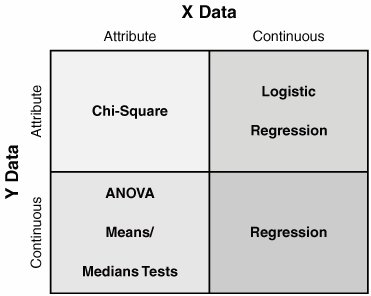

In [367]:
Image("images/chi-square.jpg")

### Multi values Variables

In [368]:
df[multi_values_cols].describe()

,D,E,F,K
count,36000.000000,36000.000000,36000.000000,36000.000000
mean,1.303694,0.215389,1.016639,4.313306
std,1.117014,0.540786,0.385688,13.664374
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000
75%,2.000000,0.000000,1.000000,3.000000
max,8.000000,6.000000,37.000000,1961.000000


## Anova (one-way)

In [369]:
# Find ANOVA of multi values variables vs target variable

"""
I have conclude that only K variable is non-categorical column
and all others multi value columns are categorical columns instead of non-categorical
"""

# i feed only K varibale to find significance with target variable(churn)

lm = ols('{a} ~ churn'.format(a="K"), data=df).fit()
table = sm.stats.anova_lm(lm)

# # Check whether a p-value is less than x(default=0.05/5%)
# if table["PR(>F)"]["churn"] < 0.05:
#     multi_values_selecte_cols.append(col)
print("K column VS target column(churn)\n")
print(table.head())

K column VS target column(churn)

               df        sum_sq        mean_sq           F         PR(>F)
churn         1.0  1.065265e+05  106526.481361  579.701051  4.419706e-127
Residual  35998.0  6.615031e+06     183.761063         NaN            NaN


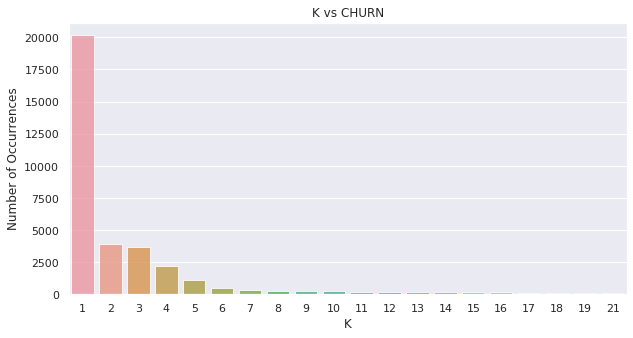

In [370]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = df['K'].value_counts()
city_count = city_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('K vs CHURN')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('K', fontsize=12)
plt.show()

In [371]:
# select only values which is greater than 20
k_val_greater_10 = df[df["K"] > 10]["K"].count()
k_val_less_10 = df[df["K"] <= 10]["K"].count()


print('K columns contains values less than "{a}" values'.format(a=k_val_less_10))
print(k_val_less_10/(k_val_less_10+k_val_greater_10)*100)
print('K column contains values greater than "{a}" values'.format(a=k_val_greater_10))
print(k_val_greater_10/(k_val_less_10+k_val_greater_10)*100)

K columns contains values less than "32710" values
90.86111111111111
K column contains values greater than "3290" values
9.13888888888889


In [372]:
# So I have conclude that we can drop these value which is greater that 10 is only 9% of totol records

In [374]:
indexNames = df[df["K"] > 10].index

df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

In [377]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,B3,C1,C2,C3,D,E,F,I1,I2,I3,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,K,churn
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0
1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1
3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [378]:
# Now we have more churn records compared with not-churn
df["churn"].value_counts()

1    17318
0    15392
Name: churn, dtype: int64

## Chi-square test

In [384]:
"""
now multi values columns except K column consider in categorical category

"""
left_multivalue_cols = multi_values_cols[:-1]

new_cols = binary_values_cols.copy()

new_cols.extend(left_multivalue_cols)
print(new_cols)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'I1', 'I2', 'I3', 'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10', 'J11', 'J12', 'J13', 'J14', 'J15', 'J16', 'D', 'E', 'F', 'D', 'E', 'F']


In [258]:
# chi-square test to check the significane of input variables with output label

def check_chi_square(cols_list, label_col):
    col_names = [col for col in cols_list if col not in label_col]
    co_matrix = {}
    for col in col_names:
        
        co_matrix[col] = pd.crosstab(df[col], label_col)
        
        chi2_stat, p_val, dof, ex = chi2_contingency(co_matrix[col])
        
        return ("Column:",col,"VS",label_col.name,dict(chi2_stat=chi2_stat, p_val=p_val, dof=dof))

In [385]:
# lets find p-value of each column with target column(churn)

results = check_chi_square(new_cols, df["churn"])
print(results)

Column: A1 VS churn {'chi2_stat': 38.50445298972561, 'p_val': 5.462889842320549e-10, 'dof': 1}
Column: A2 VS churn {'chi2_stat': 322.3966702089331, 'p_val': 4.3537207335386555e-72, 'dof': 1}
Column: A3 VS churn {'chi2_stat': 7.328797032040622, 'p_val': 0.0067858455515997975, 'dof': 1}
Column: A4 VS churn {'chi2_stat': 1.241683153046873, 'p_val': 0.2651469156067218, 'dof': 1}
Column: A5 VS churn {'chi2_stat': 100.04015903834545, 'p_val': 1.4933810674327357e-23, 'dof': 1}
Column: A6 VS churn {'chi2_stat': 243.1781891452477, 'p_val': 7.975115961847469e-55, 'dof': 1}
Column: A7 VS churn {'chi2_stat': 207.73073731326105, 'p_val': 4.295039220575898e-47, 'dof': 1}
Column: A8 VS churn {'chi2_stat': 46.38144980284028, 'p_val': 9.733263308770092e-12, 'dof': 1}
Column: B1 VS churn {'chi2_stat': 64.42835007411934, 'p_val': 1.0010732261715925e-15, 'dof': 1}
Column: B2 VS churn {'chi2_stat': 65.91283354566278, 'p_val': 4.713127551016366e-16, 'dof': 1}
Column: B3 VS churn {'chi2_stat': 310.2830356198

In [393]:
# Variable A4, C1, C2, J3, J5, J8, J12, J14 have very high p-values(greater than 0.05 threshold)
# Without K Variable

selected_columns = [col for col in new_cols if col not in ["A4", "C1", "C2", "J3", "J5", "J8", "J12", "J14"]]
print(selected_columns)

['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'B3', 'C3', 'I1', 'I2', 'I3', 'J1', 'J2', 'J4', 'J6', 'J7', 'J9', 'J10', 'J11', 'J13', 'J15', 'J16', 'D', 'E', 'F', 'D', 'E', 'F']


# Model Training

# Play with categotrical variables

In [438]:
Y = df["churn"].values
X = df[selected_columns] # selected filtered columns with low p-value

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123) 

### Random Forest

In [439]:
from sklearn.ensemble import RandomForestClassifier

In [440]:
rf_model = RandomForestClassifier(n_estimators=100,
                               bootstrap=True)

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [441]:
# make predictions on test data
rf_predictions = rf_model.predict(X_test)

# Random Forest Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      3816
           1       0.76      0.59      0.67      4362

   micro avg       0.68      0.68      0.68      8178
   macro avg       0.70      0.69      0.68      8178
weighted avg       0.70      0.68      0.68      8178



In [442]:
print("RF Accuracy :",accuracy_score(y_test, rf_predictions))

RF Accuracy : 0.6847640009782343


In [443]:
# confusion matrix
confusion_matrix(y_test, rf_predictions)

array([[3011,  805],
       [1773, 2589]])

In [444]:
# roc score
roc_auc_score(y_test, rf_predictions)

0.6912905986233306

### Grid Search

In [401]:
"""
To find best parameters for KNN
"""

# using K-NeighborsClassifier
knc = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(3, 29, 2),
             } # use gridsearch to test all values for n_neighbors

# using Grid search cross validation for best parameters selection
knc_gscv = GridSearchCV(knc, param_grid)# fit model to data
knc_gscv.fit(X, Y)
knc_gscv.best_params_

{'n_neighbors': 27}

### K-Neighbors Classifier (KNN)

In [402]:
# passing the best finded parameter to the KNN
knn =  KNeighborsClassifier(n_neighbors=knc_gscv.best_estimator_.n_neighbors)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='uniform')

In [403]:
# make predictions on test data
knn_predictions = knn.predict(X_test)

In [404]:
# Confusion matrix
confusion_matrix(y_test, knn_predictions)

array([[3061,  755],
       [2037, 2325]])

In [405]:
# KNN Accuracy
print("KNC Accuracy :",accuracy_score(y_test, knn_predictions))

KNC Accuracy : 0.6585962337979946


In [406]:
# Knc Classification Report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      3816
           1       0.75      0.53      0.62      4362

   micro avg       0.66      0.66      0.66      8178
   macro avg       0.68      0.67      0.66      8178
weighted avg       0.68      0.66      0.65      8178



# Play with not-categorical Variable (K)

In [464]:
# split the selected (continous columns) data into train and test

Y = df["churn"].values
X = df[["K"]]
# X = df[continous_selected_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123)

In [465]:
X_train.head()

,K
14128,1
7468,1
15726,4
24486,4
1338,1


### Logistics Regression

In [466]:
lr = LogisticRegression()
lr_result = lr.fit(X_train, y_train)

In [467]:
lr_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [468]:
# make predictions on test dataset
lr_prediction = lr.predict(X_test)

# prediction accuracy
print(accuracy_score(y_test, lr_prediction))

0.6451455123502079


In [469]:
# confusion metrix
confusion_matrix(y_test, lr_prediction)

array([[1513, 2303],
       [ 599, 3763]])

In [470]:
# Classification Report
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      3816
           1       0.62      0.86      0.72      4362

   micro avg       0.65      0.65      0.65      8178
   macro avg       0.67      0.63      0.62      8178
weighted avg       0.67      0.65      0.62      8178



In [471]:
# logit_model=sm.Logit(y_train,X_train)
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.686920
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                24532
Model:                          Logit   Df Residuals:                    24531
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:                0.006715
Time:                        15:07:41   Log-Likelihood:                -16852.
converged:                       True   LL-Null:                       -16965.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
K             -0.0851      0.005    -17.206      0.000      -0.095      -0.075


## Ensemble

In [472]:
# Merge the logistics and Random forest model using Votting classifier
from sklearn.ensemble import VotingClassifier

est_Ensemble = VotingClassifier(estimators=[('lr', lr), ('rf', rf_model)],
                        voting='soft',
                        weights=[1, 1])

Ensemble=est_Ensemble.fit(X_train,y_train)
est_prediction = Ensemble.predict(X_test)

In [473]:
confusion_matrix(y_test, est_prediction)

array([[1513, 2303],
       [ 599, 3763]])

In [474]:
# Classification Report
print(classification_report(y_test, est_prediction))

              precision    recall  f1-score   support

           0       0.72      0.40      0.51      3816
           1       0.62      0.86      0.72      4362

   micro avg       0.65      0.65      0.65      8178
   macro avg       0.67      0.63      0.62      8178
weighted avg       0.67      0.65      0.62      8178



## Without drop any variable high p-value except K variable

In [478]:
Y = df["churn"].values
X = df[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123) 

In [479]:
lr = LogisticRegression()
result = lr.fit(X_train, y_train)

In [480]:
# Predictions on test dataset
lr_prediction = lr.predict(X_test)

# print the prediction accuracy
print(accuracy_score(y_test, lr_prediction))

0.6816467950677673


### Grid Search Cross Validation (gscv)

In [482]:
# using K-NeighborsClassifier
knc = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(3, 29, 2),
             } # use gridsearch to test all values for n_neighbors

# using Grid search cross validation for best parameters selection
knc_gscv = GridSearchCV(knc, param_grid)# fit model to data
knc_gscv.fit(X, Y)
knc_gscv.best_params_

{'n_neighbors': 27}

### K-Neighbors Classifier (KNN)

In [483]:
knn =  KNeighborsClassifier(n_neighbors=knc_gscv.best_estimator_.n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=27, p=2,
           weights='uniform')

In [484]:
knn_pred = knn.predict(X_test)

In [485]:
confusion_matrix(y_test, knn_pred)

array([[3848,  750],
       [1759, 3456]])

In [486]:
# Accuracy
print("KNC Accuracy :",accuracy_score(y_test, knn_pred))

KNC Accuracy : 0.7443187608274737


In [487]:
# Knc Classification Report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.84      0.75      4598
           1       0.82      0.66      0.73      5215

   micro avg       0.74      0.74      0.74      9813
   macro avg       0.75      0.75      0.74      9813
weighted avg       0.76      0.74      0.74      9813



### Random Forest

In [488]:
rf_model = RandomForestClassifier(n_estimators=100,
                               bootstrap=True)

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [489]:
# make predictions on test data
rf_predictions = rf_model.predict(X_test)

In [490]:
# Random Forest Classification Report
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76      4598
           1       0.83      0.68      0.74      5215

   micro avg       0.75      0.75      0.75      9813
   macro avg       0.76      0.76      0.75      9813
weighted avg       0.76      0.75      0.75      9813



In [491]:
print("RF Accuracy :",accuracy_score(y_test, rf_predictions))

RF Accuracy : 0.7519616834810965


In [492]:
# confusion matrix
confusion_matrix(y_test, rf_predictions)

array([[3852,  746],
       [1688, 3527]])

In [493]:
# roc score
roc_auc_score(y_test, rf_predictions)

0.7570369292247202